# Анализ и визуализация телеметрии самосвалов
В этом ноутбуке загружается предобработанный датасет `telemetry_filtered_filled.csv` и строятся графики для анализа поведения техники (распределения, корреляции, простои и временные ряды).

In [3]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
def optimize_dtypes(df):
    df_optimized = df.copy()

    # float64 → float32
    float_cols = df_optimized.select_dtypes(include='float64').columns
    df_optimized[float_cols] = df_optimized[float_cols].astype('float32')

    # int64 → int32
    int_cols = df_optimized.select_dtypes(include='int64').columns
    df_optimized[int_cols] = df_optimized[int_cols].astype('int32')

    # object → category (для строк, где мало уникальных значений)
    object_cols = df_optimized.select_dtypes(include='object').columns
    for col in object_cols:
        num_unique_values = df_optimized[col].nunique()
        num_total_values = len(df_optimized[col])
        if num_unique_values / num_total_values < 0.5:
            df_optimized[col] = df_optimized[col].astype('category')

    return df_optimized

def setup_pandas_options():
    """Настройка глобальных опций pandas для отображения."""
    pd.set_option("display.precision", 3)
    pd.set_option("expand_frame_repr", False)

setup_pandas_options()

In [9]:
data_root = '../dataset'
filtered_data_path = os.path.join(data_root, 'raw/telemetry/telemetry_filtered_optimized.parquet')
filtered_data = pd.read_parquet(filtered_data_path)
display(filtered_data.head())
print('Изменение типа данных для оптимизации памяти..')
filtered_data = optimize_dtypes(filtered_data)

,create_dt,mdm_object_id,mdm_object_name,mdm_model_name,alt,speed_gps,inst_fuel,weight,temp_engine,turn_engine,...,torque_nn,pres_des_rail_injector_nn,dynamic_brake,dfm_in_hour,dfm_out_sum,dfm_out_hour,mdm_object_uuid,meta_object_name,meta_model_name,is_stopped
0,2024-01-01 12:23:42+11:00,1661,1395,БелАЗ 75306 Cummins,-66.0,0.0,293.0,19.0,66.0,6425.0,...,126.0,94.0,0.0,0.0,0.0,0.0,83397e13-90c4-11ec-98b9-00155d5fc801,1395,БелАЗ 75306 Cummins,1
1,2024-01-01 12:23:47+11:00,1661,1395,БелАЗ 75306 Cummins,-66.0,0.0,257.0,34.0,66.0,6395.0,...,127.0,99.0,0.0,0.0,0.0,0.0,83397e13-90c4-11ec-98b9-00155d5fc801,1395,БелАЗ 75306 Cummins,1
2,2024-01-01 12:23:52+11:00,1661,1395,БелАЗ 75306 Cummins,-66.0,0.0,263.0,35.0,66.0,6409.0,...,127.0,98.0,0.0,0.0,0.0,0.0,83397e13-90c4-11ec-98b9-00155d5fc801,1395,БелАЗ 75306 Cummins,1
3,2024-01-01 12:23:57+11:00,1661,1395,БелАЗ 75306 Cummins,-66.0,0.0,494.0,35.0,66.0,6392.0,...,127.0,101.0,0.0,0.0,0.0,0.0,83397e13-90c4-11ec-98b9-00155d5fc801,1395,БелАЗ 75306 Cummins,1
4,2024-01-01 12:24:02+11:00,1661,1395,БелАЗ 75306 Cummins,-66.0,0.0,431.0,34.0,66.0,6387.0,...,127.0,88.0,0.0,0.0,0.0,0.0,83397e13-90c4-11ec-98b9-00155d5fc801,1395,БелАЗ 75306 Cummins,1


Изменение типа данных для оптимизации памяти..


In [10]:
print(f'Потребление памяти после оптимизации:')
print(filtered_data.info(memory_usage='deep'))

Потребление памяти после оптимизации:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34314060 entries, 0 to 34314059
Data columns (total 24 columns):
 #   Column                     Dtype                                
---  ------                     -----                                
 0   create_dt                  datetime64[ns, pytz.FixedOffset(660)]
 1   mdm_object_id              int32                                
 2   mdm_object_name            int32                                
 3   mdm_model_name             category                             
 4   alt                        float32                              
 5   speed_gps                  float32                              
 6   inst_fuel                  float32                              
 7   weight                     float32                              
 8   temp_engine                float32                              
 9   turn_engine                float32                              
 10  lo

In [11]:
print('Размер датасета:', filtered_data.shape)

Размер датасета: (34314060, 24)


In [12]:
print('Проверка на пропуски в данных:', filtered_data.isnull().sum())

Проверка на пропуски в данных: create_dt                    0
mdm_object_id                0
mdm_object_name              0
mdm_model_name               0
alt                          0
speed_gps                    0
inst_fuel                    0
weight                       0
temp_engine                  0
turn_engine                  0
load_engine                  0
pres_coolant_nn              0
pres_rail_injector_nn        0
pres_temp_engine_nn          0
torque_nn                    0
pres_des_rail_injector_nn    0
dynamic_brake                0
dfm_in_hour                  0
dfm_out_sum                  0
dfm_out_hour                 0
mdm_object_uuid              0
meta_object_name             0
meta_model_name              0
is_stopped                   0
dtype: int64


In [13]:
print('Статистическое описание данных:')
display(filtered_data.describe())

Статистическое описание данных:


,mdm_object_id,mdm_object_name,alt,speed_gps,inst_fuel,weight,temp_engine,turn_engine,load_engine,pres_coolant_nn,pres_rail_injector_nn,pres_temp_engine_nn,torque_nn,pres_des_rail_injector_nn,dynamic_brake,dfm_in_hour,dfm_out_sum,dfm_out_hour,meta_object_name,is_stopped
count,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07,3.431e+07
mean,5.075e+03,1.399e+03,4.979e+01,1.355e+01,2.780e+03,1.042e+02,8.196e+01,9.469e+03,3.736e+01,4.863e+01,6.833e+01,8.295e+01,1.592e+02,1.406e+02,2.966e+03,-1.907e+08,4.931e+07,-1.907e+08,1.399e+03,3.172e-01
std,7.605e+03,4.878e+01,8.099e+01,1.184e+01,3.171e+03,1.069e+02,1.318e+01,3.803e+03,4.096e+01,2.937e+01,8.612e+01,2.000e+01,4.019e+01,6.580e+01,7.631e+03,6.380e+08,1.538e+08,6.380e+08,4.878e+01,4.654e-01
min,1.381e+03,1.349e+03,-1.097e+03,0.000e+00,0.000e+00,0.000e+00,2.300e+01,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,-2.147e+09,0.000e+00,-2.147e+09,1.349e+03,0.000e+00
25%,1.383e+03,1.374e+03,-7.000e+00,0.000e+00,2.470e+02,0.000e+00,7.300e+01,6.417e+03,0.000e+00,2.400e+01,7.000e+00,8.600e+01,1.250e+02,9.500e+01,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.374e+03,0.000e+00
50%,1.581e+03,1.385e+03,5.200e+01,1.340e+01,7.250e+02,4.000e+01,8.200e+01,9.808e+03,1.100e+01,4.300e+01,1.600e+01,8.600e+01,1.310e+02,1.260e+02,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.385e+03,0.000e+00
75%,1.661e+03,1.395e+03,9.600e+01,2.140e+01,6.455e+03,2.190e+02,9.000e+01,1.340e+04,8.400e+01,6.800e+01,1.510e+02,8.800e+01,2.070e+02,1.930e+02,1.380e+02,0.000e+00,0.000e+00,0.000e+00,1.395e+03,1.000e+00
max,2.119e+04,1.497e+03,2.190e+03,1.985e+02,9.979e+03,7.970e+02,1.230e+02,1.720e+04,1.250e+02,2.050e+02,4.920e+02,1.250e+02,2.460e+02,6.620e+02,3.369e+04,2.147e+09,6.761e+08,2.147e+09,1.497e+03,1.000e+00


## Общая информация по объектам и моделям

In [15]:
print('\nРаспределение по уникальным объектам (самосвалам):')
print(filtered_data['mdm_object_id'].value_counts())
print('\nКоличество уникальных моделей:')
print(filtered_data['mdm_object_name'].nunique())


Распределение по уникальным объектам (самосвалам):
mdm_object_id
1661     8670077
1381     6550914
21186    6251001
1383     5291948
1384     4981024
1581     2569096
Name: count, dtype: int64

Количество уникальных моделей:
6


## Базовая фильтрация и новые признаки
- Оставляем только записи с положительной температурой двигателя.
- Ограничиваем скорость сверху (например, < 200 км/ч).
- Добавляем бинарный флаг `is_stopped` (самосвал стоял, если `speed_gps == 0`).

## Корреляционный анализ
Считаем корреляционную матрицу по числовым признакам, строим тепловую карту и выделяем пары признаков с сильной корреляцией по модулю > 0.6.

In [20]:
numeric_data = filtered_data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()
print('Корреляционная матрица:')
display(corr_matrix)

Корреляционная матрица:


,mdm_object_id,mdm_object_name,alt,speed_gps,inst_fuel,weight,temp_engine,turn_engine,load_engine,pres_coolant_nn,pres_rail_injector_nn,pres_temp_engine_nn,torque_nn,pres_des_rail_injector_nn,dynamic_brake,dfm_in_hour,dfm_out_sum,dfm_out_hour,meta_object_name,is_stopped
mdm_object_id,1.000,9.509e-01,1.092e-02,-0.003,-0.021,-0.015,-0.164,-0.034,-0.024,-0.030,-0.013,0.141,-0.024,-0.020,6.973e-02,0.145,-0.156,0.145,9.509e-01,9.320e-03
mdm_object_name,0.951,1.000e+00,-8.989e-03,0.005,-0.023,-0.017,-0.099,-0.031,-0.027,-0.032,-0.011,0.245,-0.026,-0.014,4.905e-02,0.154,-0.165,0.154,1.000e+00,-3.933e-04
alt,0.011,-8.989e-03,1.000e+00,0.057,0.110,0.096,-0.053,0.102,0.111,0.007,0.113,0.134,0.112,0.047,-2.100e-04,-0.036,0.044,-0.036,-8.989e-03,-1.086e-01
speed_gps,-0.003,4.541e-03,5.651e-02,1.000,0.213,0.029,0.015,0.472,0.177,0.419,0.209,0.093,0.198,0.505,3.494e-01,-0.060,0.027,-0.060,4.541e-03,-7.800e-01
inst_fuel,-0.021,-2.314e-02,1.096e-01,0.213,1.000,0.615,-0.038,0.820,0.957,0.824,0.968,0.160,0.981,0.026,-2.598e-01,-0.017,-0.005,-0.017,-2.314e-02,-4.769e-01
weight,-0.015,-1.674e-02,9.588e-02,0.029,0.615,1.000,0.002,0.531,0.588,0.510,0.616,0.135,0.607,0.034,-1.999e-01,-0.015,-0.008,-0.015,-1.674e-02,-2.680e-01
temp_engine,-0.164,-9.941e-02,-5.350e-02,0.015,-0.038,0.002,1.000,-0.018,-0.028,-0.065,-0.042,0.059,-0.031,0.013,-4.442e-02,0.088,-0.066,0.089,-9.941e-02,-2.848e-03
turn_engine,-0.034,-3.114e-02,1.015e-01,0.472,0.820,0.531,-0.018,1.000,0.759,0.894,0.815,0.167,0.790,0.472,9.268e-03,-0.059,-0.007,-0.059,-3.114e-02,-6.667e-01
load_engine,-0.024,-2.733e-02,1.110e-01,0.177,0.957,0.588,-0.028,0.759,1.000,0.744,0.903,0.154,0.984,-0.001,-2.850e-01,-0.033,0.009,-0.033,-2.733e-02,-4.572e-01
pres_coolant_nn,-0.030,-3.181e-02,6.932e-03,0.419,0.824,0.510,-0.065,0.894,0.744,1.000,0.837,0.135,0.787,0.336,-4.413e-02,-0.064,0.022,-0.064,-3.181e-02,-5.912e-01


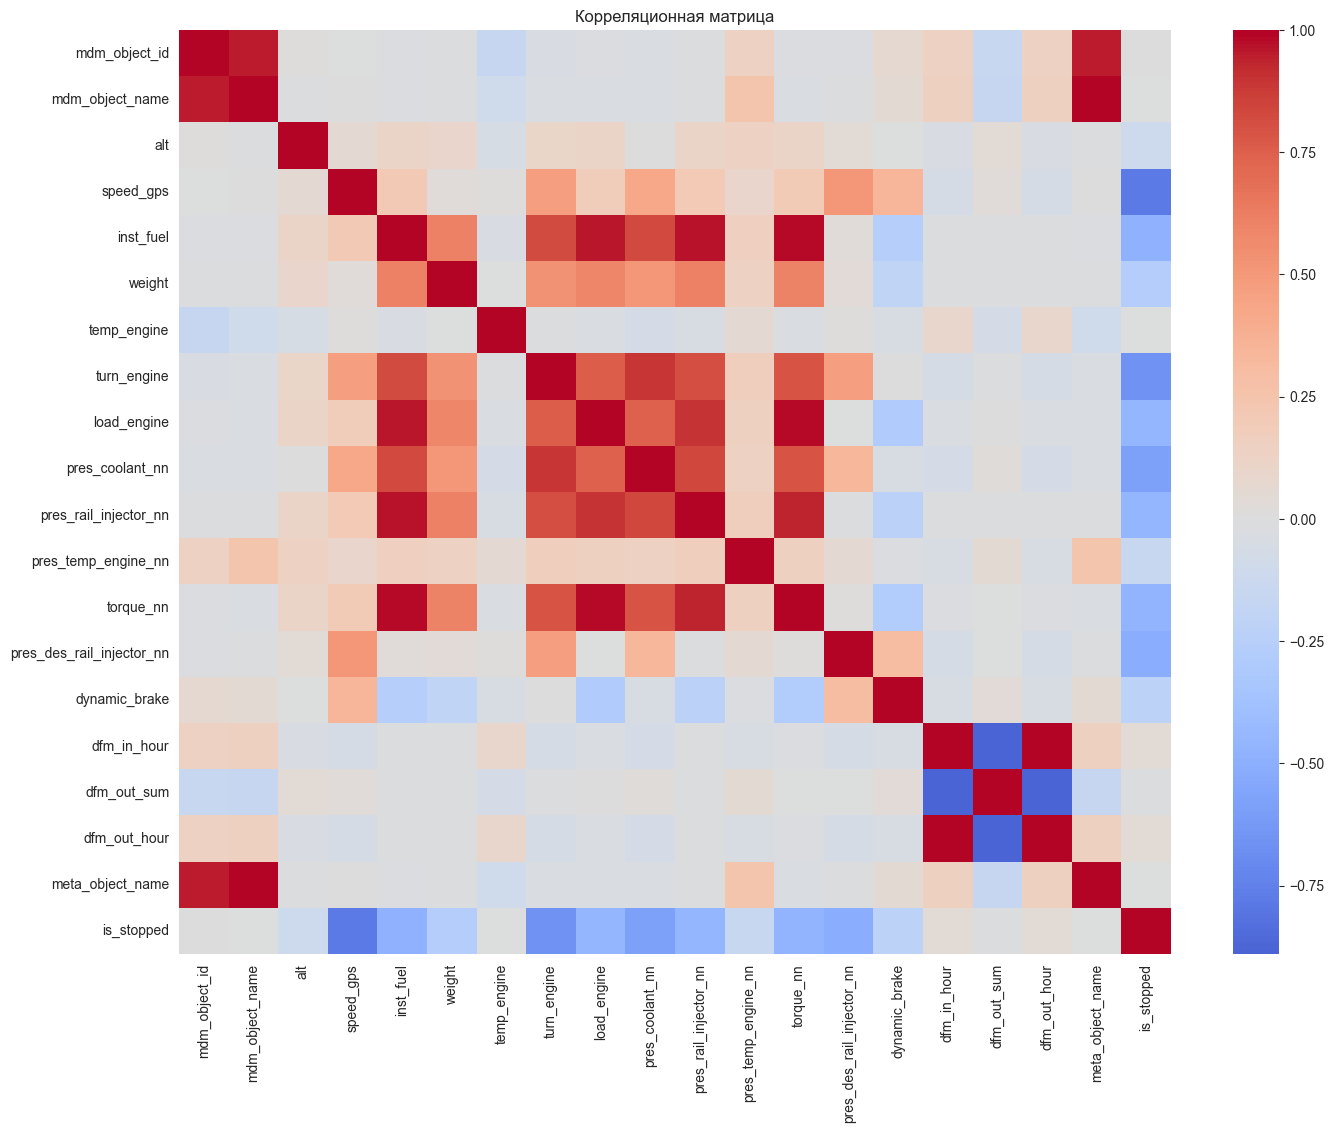

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Корреляционная матрица')
plt.show()

In [22]:
strong_corr = corr_matrix[(corr_matrix.abs() > 0.6) & (corr_matrix.abs() < 1.0)]
print('Пары с сильной корреляцией:')
display(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

Пары с сильной корреляцией:


,mdm_object_id,mdm_object_name,speed_gps,inst_fuel,weight,turn_engine,load_engine,pres_coolant_nn,pres_rail_injector_nn,torque_nn,dfm_in_hour,dfm_out_sum,dfm_out_hour,meta_object_name,is_stopped
mdm_object_id,NaN,0.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951,NaN
mdm_object_name,0.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed_gps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.780
inst_fuel,NaN,NaN,NaN,NaN,0.615,0.820,0.957,0.824,0.968,0.981,NaN,NaN,NaN,NaN,NaN
weight,NaN,NaN,NaN,0.615,NaN,NaN,NaN,NaN,0.616,0.607,NaN,NaN,NaN,NaN,NaN
turn_engine,NaN,NaN,NaN,0.820,NaN,NaN,0.759,0.894,0.815,0.790,NaN,NaN,NaN,NaN,-0.667
load_engine,NaN,NaN,NaN,0.957,NaN,0.759,NaN,0.744,0.903,0.984,NaN,NaN,NaN,NaN,NaN
pres_coolant_nn,NaN,NaN,NaN,0.824,NaN,0.894,0.744,NaN,0.837,0.787,NaN,NaN,NaN,NaN,NaN
pres_rail_injector_nn,NaN,NaN,NaN,0.968,0.616,0.815,0.903,0.837,NaN,0.938,NaN,NaN,NaN,NaN,NaN
torque_nn,NaN,NaN,NaN,0.981,0.607,0.790,0.984,0.787,0.938,NaN,NaN,NaN,NaN,NaN,NaN


## Распределения основных параметров
Строим гистограммы по ключевым числовым признакам: скорость, температура двигателя, мгновенный расход топлива, крутящий момент.

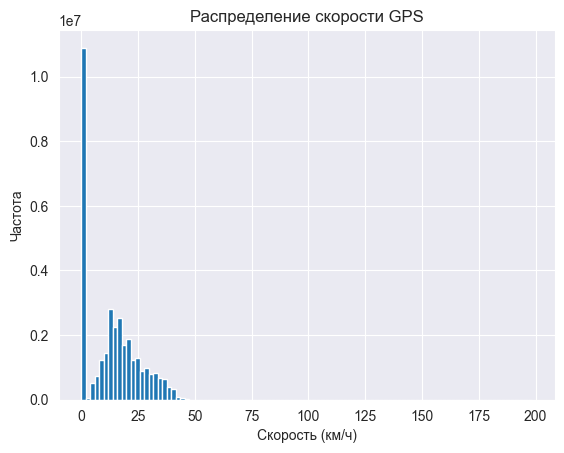

In [23]:
plt.hist(filtered_data['speed_gps'].dropna(), bins=100)
plt.title('Распределение скорости GPS')
plt.xlabel('Скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

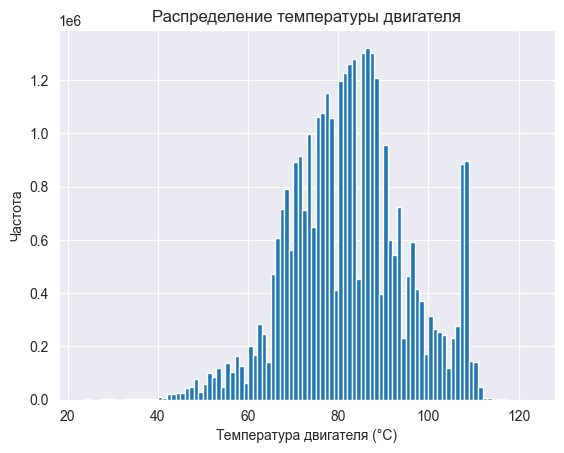

In [24]:
plt.hist(filtered_data['temp_engine'].dropna(), bins=100)
plt.title('Распределение температуры двигателя')
plt.xlabel('Температура двигателя (°C)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

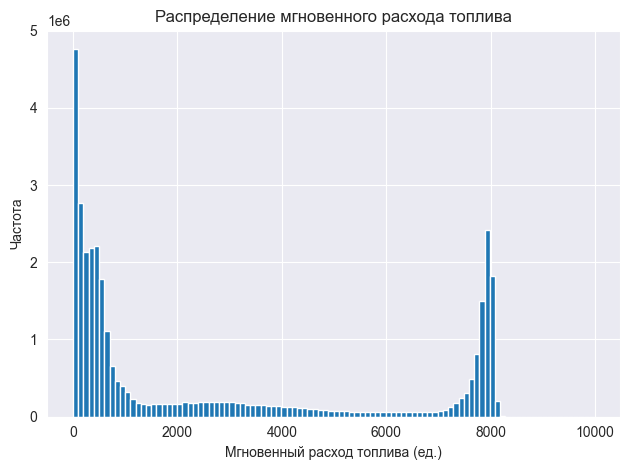

In [25]:
plt.hist(filtered_data['inst_fuel'].dropna(), bins=100)
plt.title('Распределение мгновенного расхода топлива')
plt.xlabel('Мгновенный расход топлива (ед.)')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

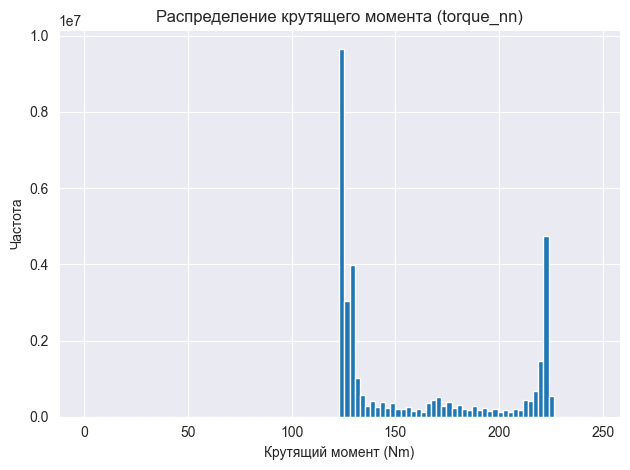

In [26]:
plt.hist(filtered_data['torque_nn'].dropna(), bins=100)
plt.title('Распределение крутящего момента (torque_nn)')
plt.xlabel('Крутящий момент (Nm)')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

## Связь скорости и расхода топлива

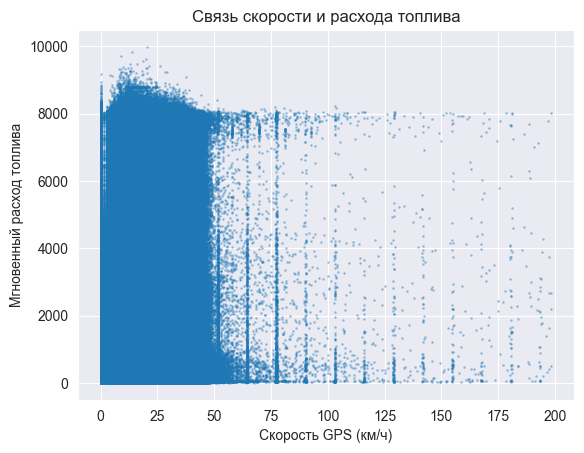

In [27]:
plt.scatter(
    filtered_data['speed_gps'],
    filtered_data['inst_fuel'],
    alpha=0.3,
    s=1  # маленький размер точки для снижения нагрузки
)
plt.title('Связь скорости и расхода топлива')
plt.xlabel('Скорость GPS (км/ч)')
plt.ylabel('Мгновенный расход топлива')
plt.grid(True)
plt.show()

## Анализ простоев
Считаем долю времени, когда самосвал стоит (скорость = 0), и строим топ-10 самых "стоячих" самосвалов.

In [28]:
stopped_ratio = (filtered_data['speed_gps'] == 0).mean()
print(f'Общая доля времени, когда самосвал стоял: {stopped_ratio:.2%}')

Общая доля времени, когда самосвал стоял: 31.72%


In [29]:
stopped_by_object = (
    filtered_data
    .groupby('mdm_object_id')['speed_gps']
    .apply(lambda x: (x == 0).mean())
    .reset_index(name='stopped_ratio')
)
stopped_by_object = stopped_by_object.sort_values(
    by='stopped_ratio', ascending=False
)
top_n = 10
print(f'\nТоп-{top_n} самосвалов по доле простоев:')
print(stopped_by_object.head(top_n))


Топ-10 самосвалов по доле простоев:
   mdm_object_id  stopped_ratio
0           1381          0.347
3           1581          0.344
5          21186          0.326
4           1661          0.307
2           1384          0.295
1           1383          0.294


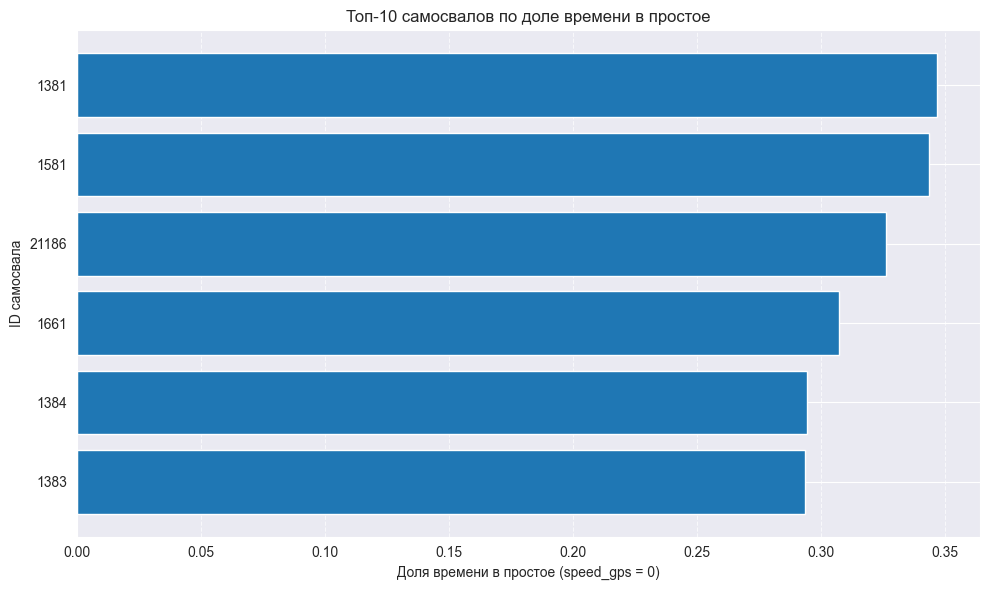

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(
    stopped_by_object['mdm_object_id'].astype(str).head(top_n),
    stopped_by_object['stopped_ratio'].head(top_n)
)
plt.xlabel('Доля времени в простое (speed_gps = 0)')
plt.ylabel('ID самосвала')
plt.title(f'Топ-{top_n} самосвалов по доле времени в простое')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Временные ряды по отдельным самосвалам
Для каждого самосвала строим графики крутящего момента и температуры двигателя во времени (две оси Y). Для ускорения берём последние 5000 точек.

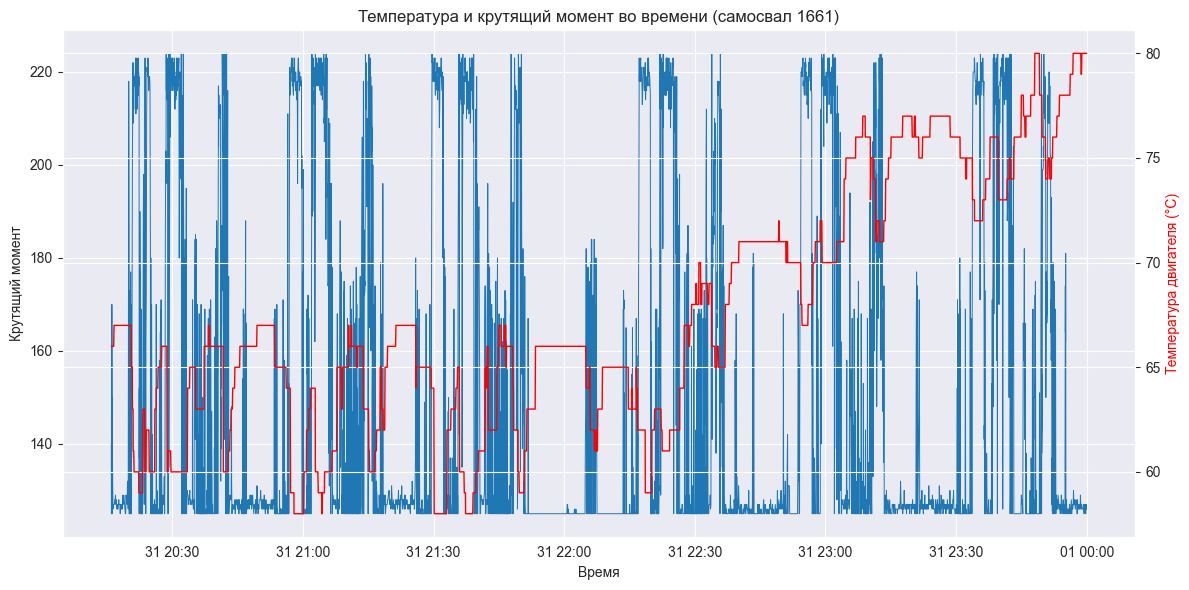

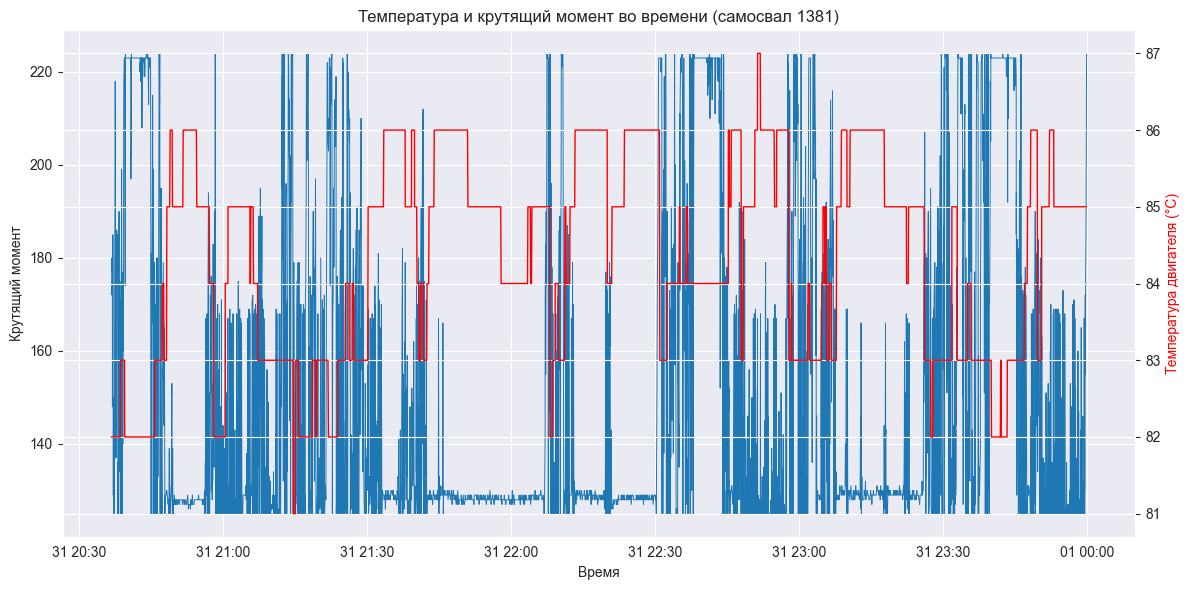

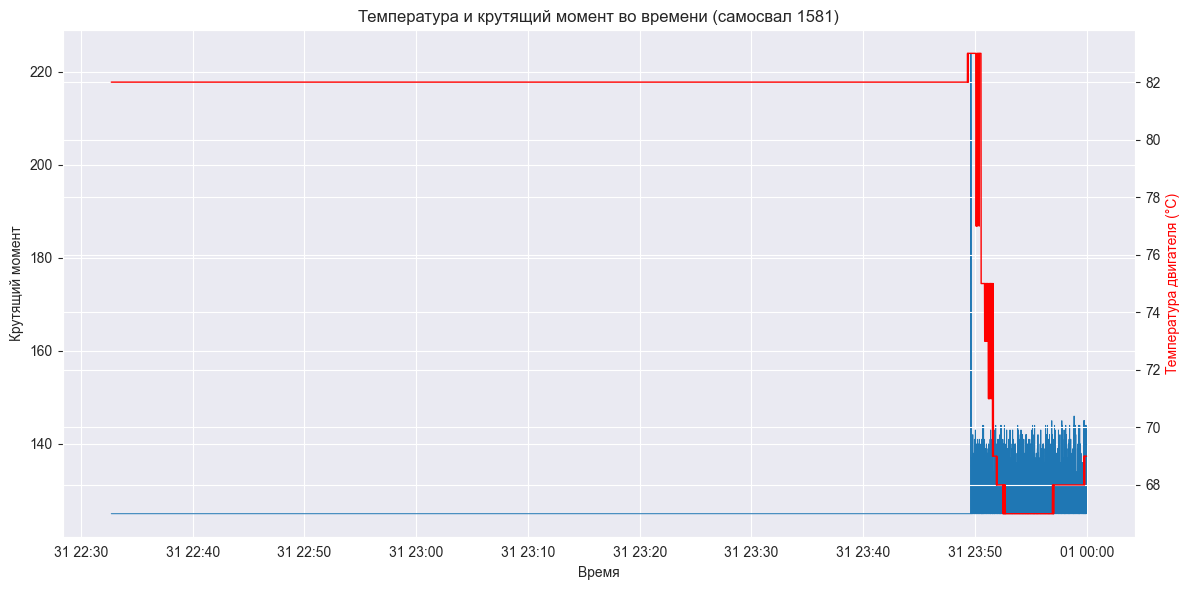

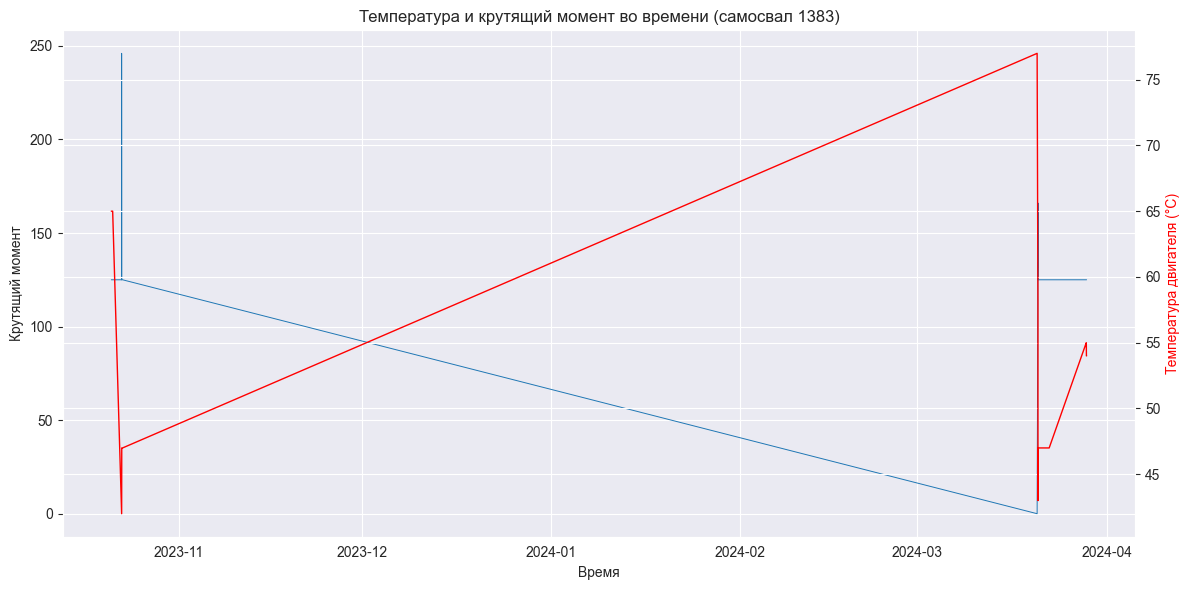

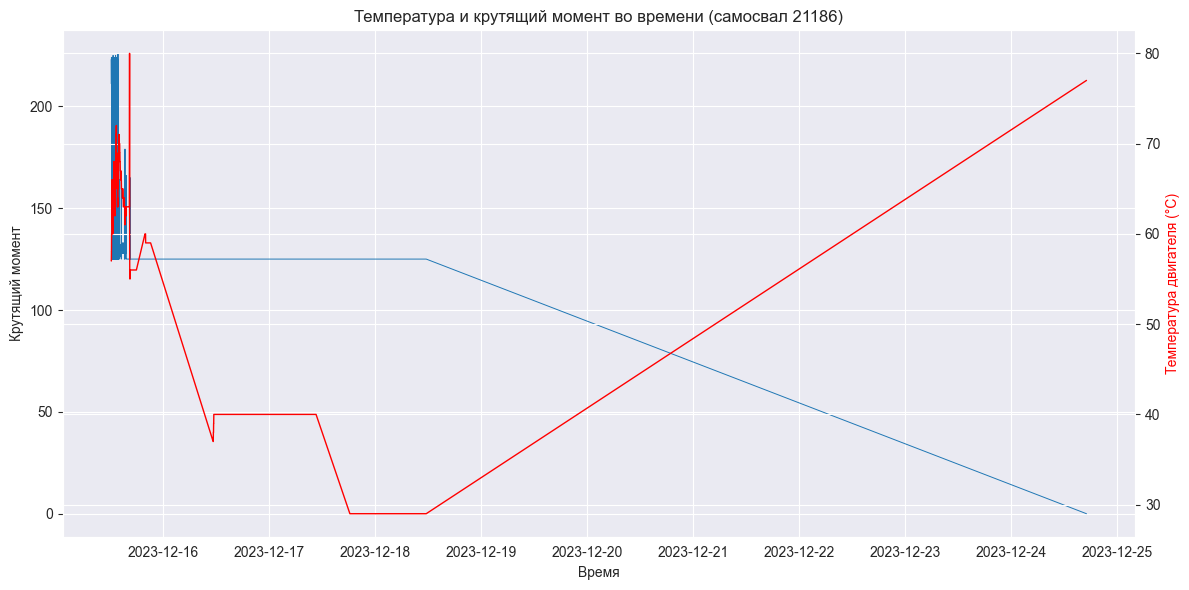

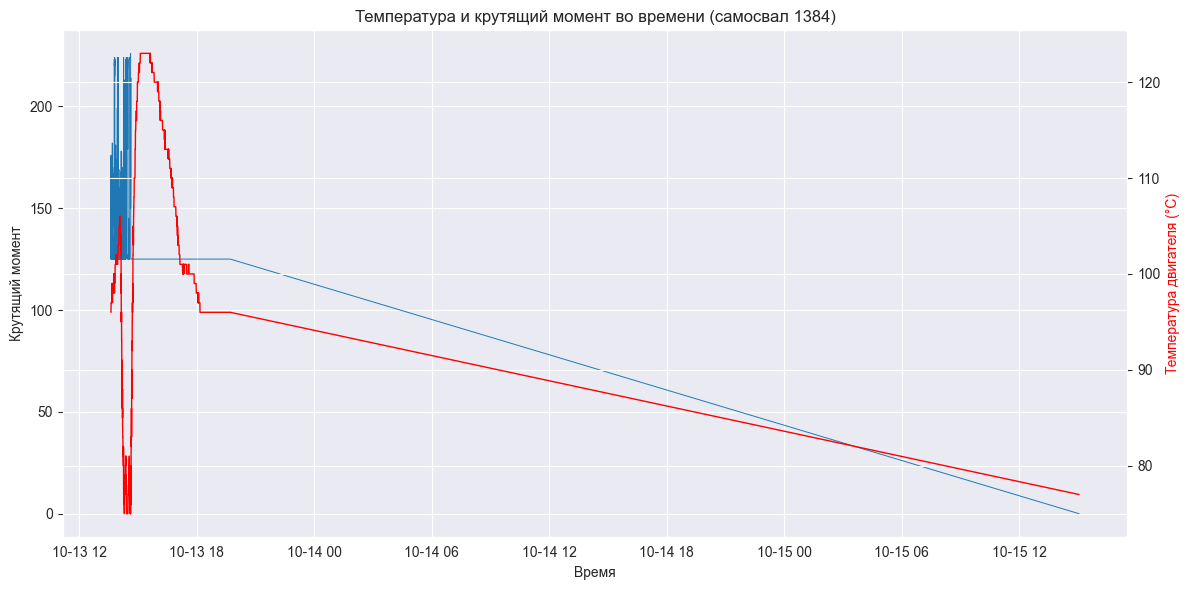

In [31]:
for truck in filtered_data['mdm_object_id'].unique():
    sample = filtered_data[filtered_data['mdm_object_id'] == truck].copy()
    sample['create_dt'] = pd.to_datetime(sample['create_dt'], errors='coerce')
    sample = sample.dropna(subset=['create_dt', 'torque_nn', 'temp_engine'])
    sample = sample.sort_values('create_dt')
    sample = sample.tail(5000)  # Для ускорения берём последние N строк

    if sample.empty:
        continue

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(sample['create_dt'], sample['torque_nn'], label='Крутящий момент (Nm)', linewidth=0.7)
    ax1.set_xlabel('Время')
    ax1.set_ylabel('Крутящий момент')

    ax2 = ax1.twinx()
    ax2.plot(sample['create_dt'], sample['temp_engine'], color='red', label='Температура двигателя (°C)', linewidth=1)
    ax2.set_ylabel('Температура двигателя (°C)', color='red')

    plt.title(f'Температура и крутящий момент во времени (самосвал {truck})')
    fig.tight_layout()
    plt.grid(True)
    plt.show()